<a href="https://colab.research.google.com/github/ad709kr/Bike-Sharing-Demand-Prediction/blob/main/Bike_sharing_demand_predicctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member name**    - Adarsh Kumar


# **Project Summary -**

Write the summary here within 500-600 words.
Summary : https://drive.google.com/file/d/1PrNm9o7wm65pu_jCUWJSYcp2PN9dksVD/view?usp=share_link

# **GitHub Link -**

Provide your GitHub Link here : https://github.com/ad709kr/Bike-Sharing-Demand-Prediction

# **Problem Statement**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

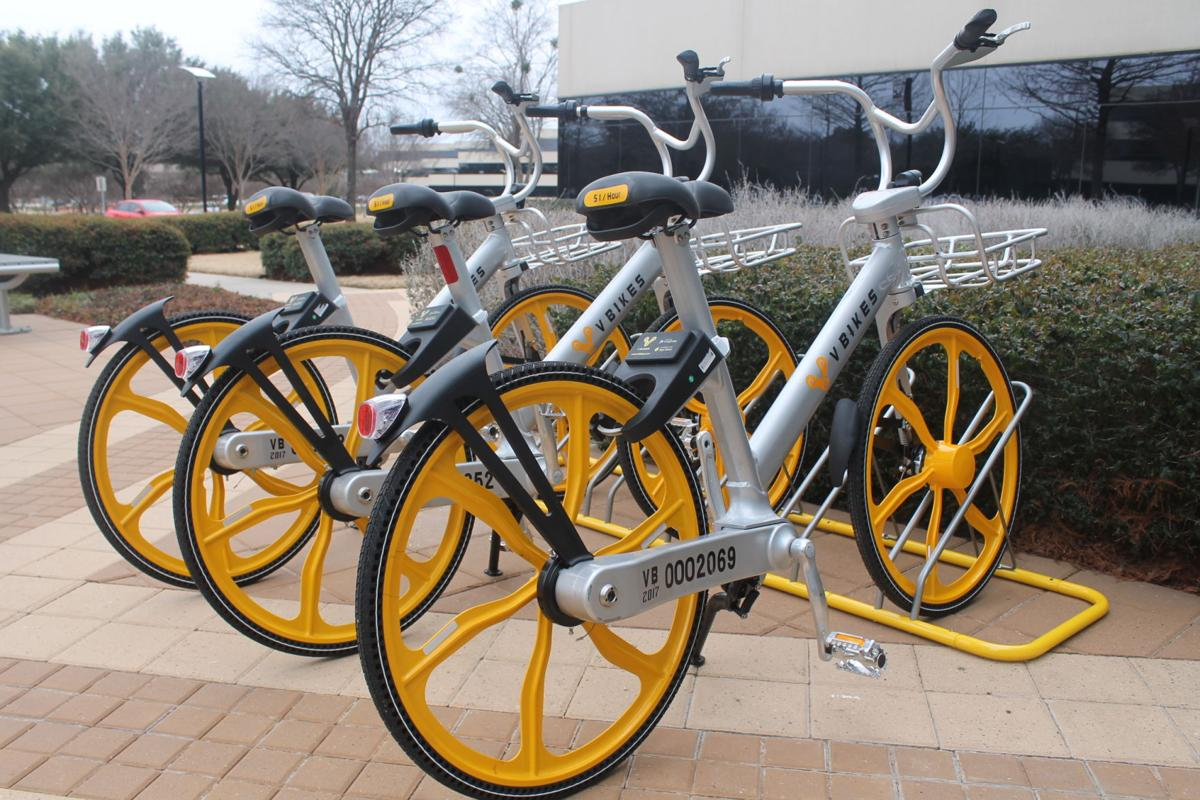

## Data Description
<br>The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
<br>**Attribute Information**:
<br>Date : year-month-day
<br>Rented Bike count - Count of bikes rented at each hour
<br>Hour - Hour of the day
<br>Temperature-Temperature in Celsius
<br>Humidity - humidity in %age.
<br>Windspeed - m/s
<br>Visibility - 10m
<br>Dew point temperature - Celsius
<br>Solar radiation - MJ/m2
<br>Rainfall - mm
<br>Snowfall - cm
<br>Seasons - Winter, Spring, Summer, Autumn
<br>Holiday - Holiday/No holiday
<br>Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
try:
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns

  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.linear_model import LinearRegression
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV

  from sklearn.linear_model import Ridge
  from sklearn.linear_model import Lasso
  from xgboost import XGBRegressor

  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_absolute_percentage_error
except Exception as e:
  print(e)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
try:
  path = '/content/drive/MyDrive/Almabetter/Bike_sharing_demand_prediction/Copy of SeoulBikeData.csv'
  file = pd.read_csv(path,encoding = 'unicode_escape')
except Exception as e:
  print(e)

### Dataset First View

In [ ]:
# Dataset First Look
file.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Dataset consist ", file.shape[0]," rows and ",file.shape[1],"columns.")

Dataset consist  8760  rows and  14 columns.


### Dataset Information

In [ ]:
# Dataset Info
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
file[file.duplicated()].count()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
file.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

There is no duplicate and missing value present in the given dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
file.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
file.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

**Date**- object feature which would be converted to datetime feature
<br>**Hour, Humidity(%),Visibility (10m)** are of int type.
<br>**Temperature(°C),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)** are of float type.
<br>**Seasons,Holiday,Functioning Day** are of object type. 
<br>**Rented Bike Count**-Target variable of int type

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(file['Hour'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
print(file['Humidity(%)'].unique()) # Although these are finite set but can have ordinal nature so we will treat it as numerical feature

[37 38 39 40 36 35 27 24 21 23 25 26 54 58 66 77 79 81 83 84 87 86 82 68
 57 49 41 48 51 53 52 55 56 69 71 73 75 91 92 89 85 76 90 88 47 30 29 32
 43 45 44 42 34 33 31 28 46 59 78 70 64 60 94 93 96 65 50 74 63 61 72 62
 22 67 80 95 15 20 17 18 16 19 14 97 98 10 13 12 11  0]


In [ ]:
print(file['Seasons'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']


In [ ]:
print(file['Holiday'].unique())

['No Holiday' 'Holiday']


In [ ]:
print(file['Functioning Day'].unique())

['Yes' 'No']


**Inference:** we have four categorical variable

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
try:
  # Lets convert pickup_datetime and drop_off datetime to datetime functions
  file['Date'] = pd.to_datetime(file['Date'])
  
  # date_time to day
  file['day']=file['Date'].dt.day_name()
  
  # date_time to month
  file['month']=file['Date'].dt.month
except Exception as e:
  print(e)

In [ ]:
file.drop(['Date'], axis=1,inplace=True) # since we have extracted the day and month information lets remove the date column

In [ ]:
# lets encode hour as morning,afternoon,evening,night
def hour_encoding(hour):
  if hour in range(6,12):
    st = 'morning'
   
  elif hour in range(12,17):
    st = 'afternoon'
  elif hour in range(17,22):
    st = 'evening'
  else:
    st = 'night'
  return st


In [ ]:
file['day_time'] = file['Hour'].apply(lambda x :hour_encoding(x))

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   objec

In [ ]:
print("Holiday")
print(file['Holiday'].value_counts())
print("Functioning Day")
print(file['Functioning Day'].value_counts())

Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [ ]:
# Lets find the total number of bikes on each category for different categorical dataset
# (1) Bike demand on Holiday feature
df = pd.DataFrame(file.groupby(['Holiday']).mean().reset_index())
print(df[['Holiday','Rented Bike Count']])

      Holiday  Rented Bike Count
0     Holiday         499.756944
1  No Holiday         715.228026


In [ ]:
# (2) Bike demand vs hours
df = pd.DataFrame(file.groupby(['Hour']).mean().reset_index())
print(df[['Hour','Rented Bike Count']])

    Hour  Rented Bike Count
0      0         541.460274
1      1         426.183562
2      2         301.630137
3      3         203.331507
4      4         132.591781
5      5         139.082192
6      6         287.564384
7      7         606.005479
8      8        1015.701370
9      9         645.983562
10    10         527.821918
11    11         600.852055
12    12         699.441096
13    13         733.246575
14    14         758.824658
15    15         829.186301
16    16         930.621918
17    17        1138.509589
18    18        1502.926027
19    19        1195.147945
20    20        1068.964384
21    21        1031.449315
22    22         922.797260
23    23         671.126027


In [ ]:
# (2) Bike demand vs Seasons
df = pd.DataFrame(file.groupby(['Seasons']).mean().reset_index())
print(df[['Seasons','Rented Bike Count']])

  Seasons  Rented Bike Count
0  Autumn         819.597985
1  Spring         730.031250
2  Summer        1034.073370
3  Winter         225.541204


In [ ]:
# (2) Bike demand vs Seasons
df = pd.DataFrame(file.groupby(['Functioning Day']).mean().reset_index())
print(df[['Functioning Day','Rented Bike Count']])

  Functioning Day  Rented Bike Count
0              No           0.000000
1             Yes         729.156999


### What all manipulations have you done and insights you found?

**Observation :**
<br> (1) counted the number of holidays and non functioning days: out of 8760 total 432 holidays and 295 non functioning days.
<br> (2) to find the mean demand of bike on different categorical features: 
<br>Answer for (2):
<br> (a) On no holiday the average demand for bike was higher approximately 1.5 times than on holiday.
<br> (b) The peak hours are 5 to 9 pm and maximum demand at 6pm. However, in morning the maximum demand at 8 am.
<br> (c) In Summer, the average demand is maximum and in winter it is minimum and it totally make sense because in winter due to very cold climatic condition most people dont prefer bike.
<br> (d) The average demand on functioning day is 729.1569


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Univariate analysis:**
<br> In this section, we plot each feature individually with  respect to the target variable which is bike demand and see how these features impact the target variable.

In [ ]:
file.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'day_time'],
      dtype='object')

#### Chart - 1 : Rented Bike Sharing





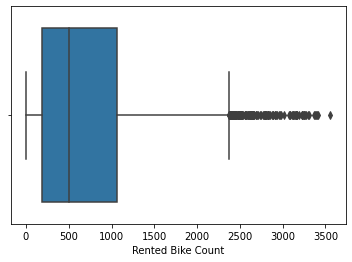

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(file['Rented Bike Count'])

In [ ]:
file['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [ ]:
## There is huge range in 75-100% which is the 1000 to 3500.
# lets observe the Bike demand between the 90 percentile to 100 percentile
for i in range(90,101,1):
  print("the {0}th percentile value is {1}".format(i,round(file['Rented Bike Count'].quantile(i/100),0)))

the 90th percentile value is 1671.0
the 91th percentile value is 1742.0
the 92th percentile value is 1832.0
the 93th percentile value is 1899.0
the 94th percentile value is 1968.0
the 95th percentile value is 2043.0
the 96th percentile value is 2135.0
the 97th percentile value is 2253.0
the 98th percentile value is 2355.0
the 99th percentile value is 2526.0
the 100th percentile value is 3556.0


In [ ]:
# In 99 percentile and 100th percentile we have huge gap. so lets zoom in between the 99 percentile and 100 percentile
for i in range(990,1001,1):
  print("the {0}th percentile value is {1}".format(i/10,round(file['Rented Bike Count'].quantile(i/1000),0)))

the 99.0th percentile value is 2526.0
the 99.1th percentile value is 2595.0
the 99.2th percentile value is 2632.0
the 99.3th percentile value is 2663.0
the 99.4th percentile value is 2783.0
the 99.5th percentile value is 2827.0
the 99.6th percentile value is 2916.0
the 99.7th percentile value is 3106.0
the 99.8th percentile value is 3169.0
the 99.9th percentile value is 3261.0
the 100.0th percentile value is 3556.0


In [ ]:
# lets pbserve the 0 to 10 percentile
for i in range(0,11,1):
  print("the {0}th percentile value is {1}".format(i,round(file['Rented Bike Count'].quantile(i/100),0)))

the 0th percentile value is 0.0
the 1th percentile value is 0.0
the 2th percentile value is 0.0
the 3th percentile value is 0.0
the 4th percentile value is 12.0
the 5th percentile value is 22.0
the 6th percentile value is 32.0
the 7th percentile value is 39.0
the 8th percentile value is 47.0
the 9th percentile value is 56.0
the 10th percentile value is 64.0


In [ ]:
# lets count the total days when the demand is zero.
df = file[file['Rented Bike Count']==0]
df.shape

(295, 16)

In [ ]:
df1 = file[file['Rented Bike Count']!=0].min()
print("the minimum demand on functioning day is", df1['Rented Bike Count'], " on day",df1['day'], "season ", df1['Seasons'])

the minimum demand on functioning day is 2  on day Friday season  Autumn


##### 1. Why did you pick the specific chart?

**Answer:** Box plot gives the 25,50,75 value along with the idea of some extreme values after the whiskers which can be an outlier.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br> (1) The median Rented Bike Demand is 504, IQR range is 191 to 1065.
<br> (2) there are total 295 days where the demand is zero, which is equal to the total number of non-functioning day. It means, on functioning day there is always some demand.
<br> (3) Top 1% demand vary from 2526 to 3556.
<br> (4) the minimum demand on functioning day is 2  on day Friday season  Autumn

## Chart 2 -Rented Bike Count vs Hour

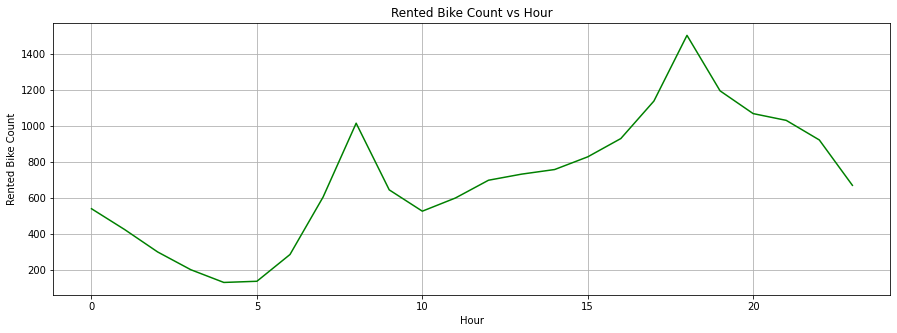

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,5))
df = pd.DataFrame(file.groupby(['Hour']).mean().reset_index())
#df1 = pd.DataFrame(file.groupby(['Hour']).sum().reset_index())
plt.plot(df['Hour'], df['Rented Bike Count'],'g')
#plt.plot(df1['Hour'], df1['Rented Bike Count'],'r')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.grid()
plt.title('Rented Bike Count vs Hour')
plt.show()

##### 1. Why did you pick the specific chart?

Since there are 24 categories in hour feature a histogram will be very congested but line graph will be more clean and interpretable. 

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
<br> (1)The peak hours are 5 to 9 pm and maximum demand at 6pm. However, in morning the maximum demand at 8 am.
<br> (2) The demand is significantly low at early morning about 4 am ,5 am. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> Knowing the average demand of bike at a given time will definitely help to provide availability of bikes.
<br> Based on the above information we can manage our resources efficiently, Like in early morning the demand is very low so we can maintain or repair the bike to make readily available during peak hours.

#### Chart - 3 : Rented Bike Sharing vs Holiday

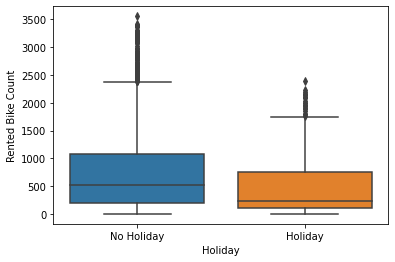

In [ ]:
# Chart - 3 visualization code
sns.boxplot(x = file['Holiday'], y=file['Rented Bike Count'])

In [ ]:
print(file['Rented Bike Count'][file['Holiday'] == 'Holiday'].describe())
print("-"*50)
print(file['Rented Bike Count'][file['Holiday'] != 'Holiday'].describe())

count     432.000000
mean      499.756944
std       570.772769
min         0.000000
25%       105.750000
50%       240.000000
75%       762.500000
max      2400.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------------
count    8328.000000
mean      715.228026
std       646.879124
min         0.000000
25%       200.000000
50%       524.500000
75%      1073.000000
max      3556.000000
Name: Rented Bike Count, dtype: float64


##### 1. Why did you pick the specific chart?

choose box plot :Because it will give all the statistical details along with it.

##### 2. What is/are the insight(s) found from the chart?

**observation** 
<br> The median demand on no holiday is more than the twice than on the holiday and the maximum demand on no holiday is also 1.5 times the holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :**
<br> Yes, it can impact positively if we keep more bikes on no holidays and plan servicing and repair work during the holidays.

#### Chart - 4 : Rented Bike Sharing vs Seasons

<Figure size 432x288 with 0 Axes>

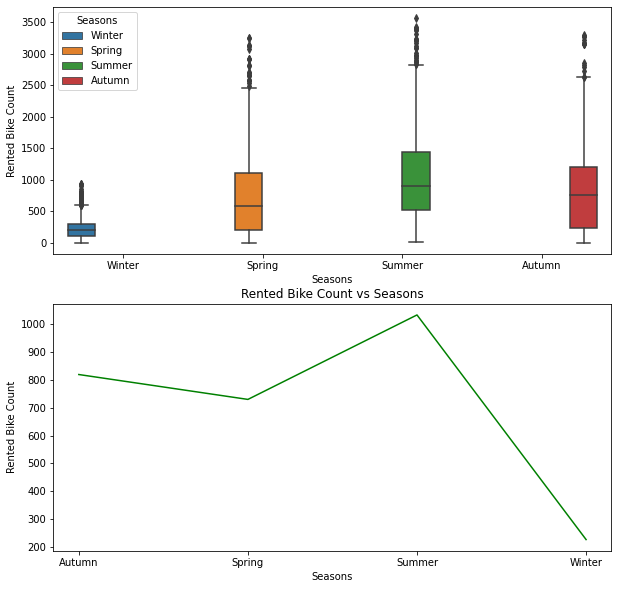

In [ ]:
# Chart - 3 visualization code
plt.figure(1)
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(x=file['Seasons'], y=file['Rented Bike Count'],hue = file['Seasons'])

plt.subplot(212)
df = pd.DataFrame(file.groupby(['Seasons']).mean().reset_index())
plt.plot(df['Seasons'], df['Rented Bike Count'],'g')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Seasons')
plt.show()

In [ ]:
print(df[['Seasons','Rented Bike Count']])

  Seasons  Rented Bike Count
0  Autumn         819.597985
1  Spring         730.031250
2  Summer        1034.073370
3  Winter         225.541204


##### 1. Why did you pick the specific chart?

**Answer :** Season feature has very few category and using histogram will more preferable.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**  In Summer, the average demand is maximum and in winter it is minimum and it totally make sense because in winter due to very cold climatic condition most people dont prefer bike. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** In summer the demand is very high so we need to focus more on the availability of bike. However in winter the demand significantly drops which will impact the business negatively.

#### Chart - 5: mean bike demand vs day

<Figure size 432x288 with 0 Axes>

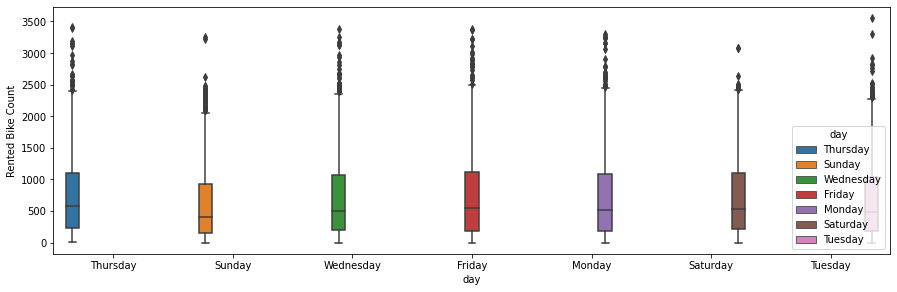

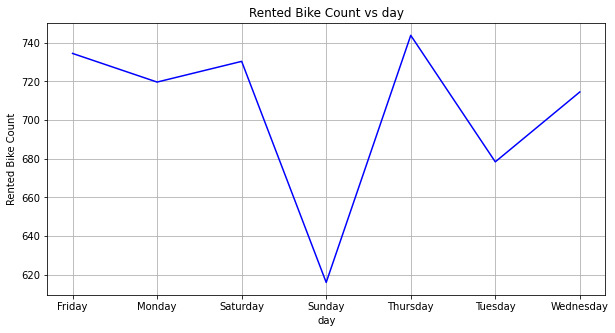

In [ ]:
# Chart - 4 visualization code
plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x=file['day'], y=file['Rented Bike Count'],hue = file['day'])

plt.figure(figsize=(10,5))
df = pd.DataFrame(file.groupby(['day']).mean().reset_index())
plt.plot(df['day'], df['Rented Bike Count'],'b')
plt.xlabel('day')
plt.ylabel('Rented Bike Count')
plt.grid()
plt.title('Rented Bike Count vs day')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer :** It shows a clear variation of the mean demand with respect to days.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here** The average demand is very low on sunday and maximum on thursday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**  on Thursdays, the demand is maximum which is good for business but sunday the demand is very low which could effect our business negatively.

#### Chart - 6 : mean bike demand vs month

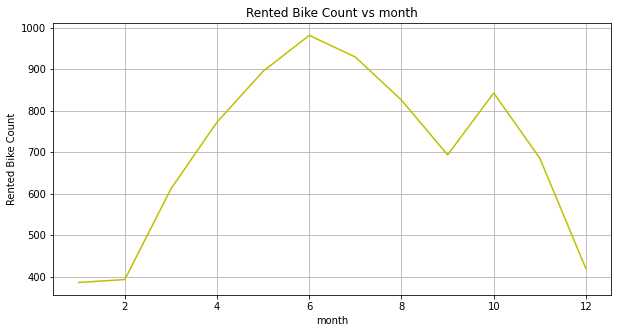

In [ ]:
plt.figure(figsize=(10,5))
df = pd.DataFrame(file.groupby(['month']).mean().reset_index())
plt.plot(df['month'], df['Rented Bike Count'],'y')
plt.xlabel('month')
plt.ylabel('Rented Bike Count')
plt.grid()
plt.title('Rented Bike Count vs month')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here** For mean demand the line chart will have clear interpretation.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**
<br> (1)In month 6, the average demand is at peak, which might be because in june there is summer season and the temperature range is in 20-30 degree celcius.
<br> (2)the demand is very low in month 12,1,2 and then start increasing, it might be because december,january,february are the winter months and demand is very low in winters but after february the temperature starts rising and due to which the demand is increasing. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> The peak demand in month 6 which can impact the business positively,but the jan,feb has very low demands which can impact business negatively.

#### Chart - 7 : Rented Bike Sharing vs numerical feature

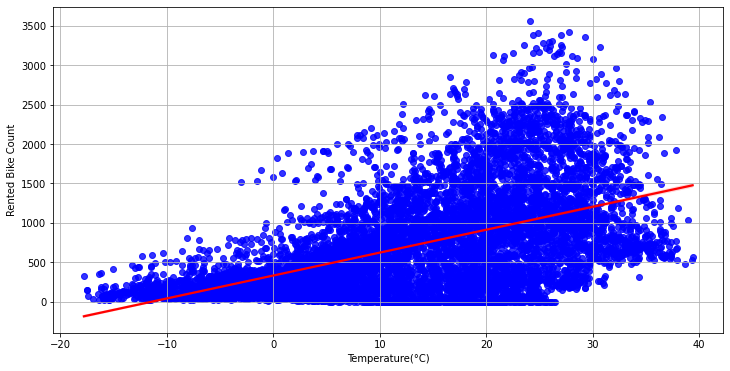

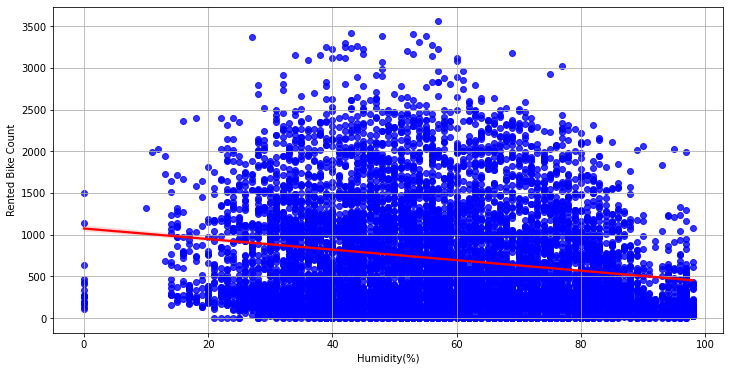

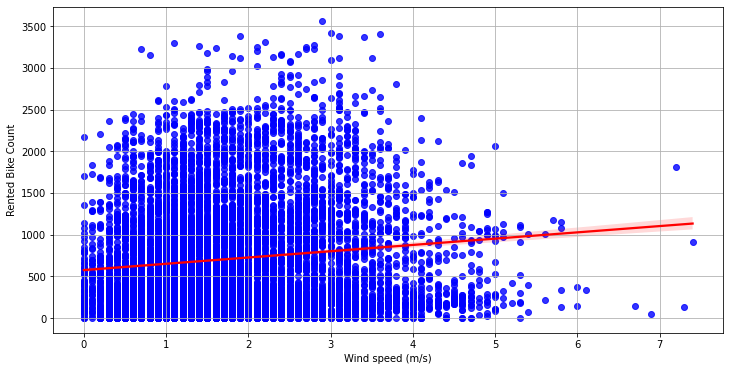

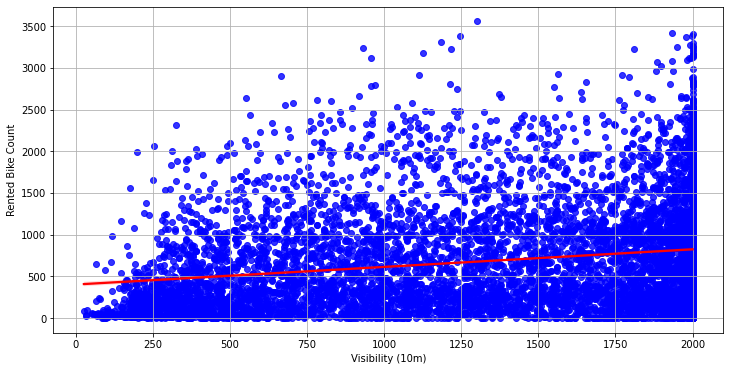

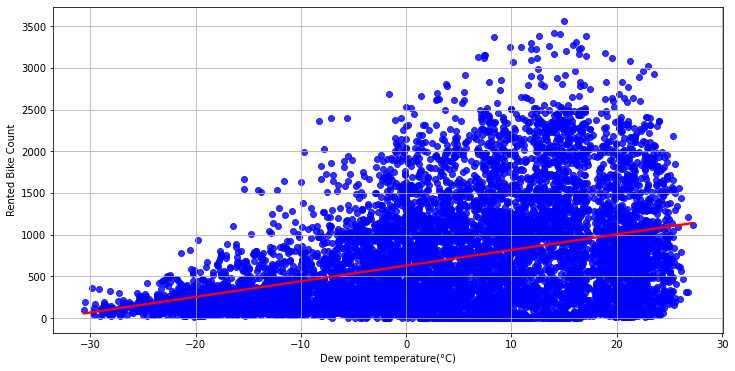

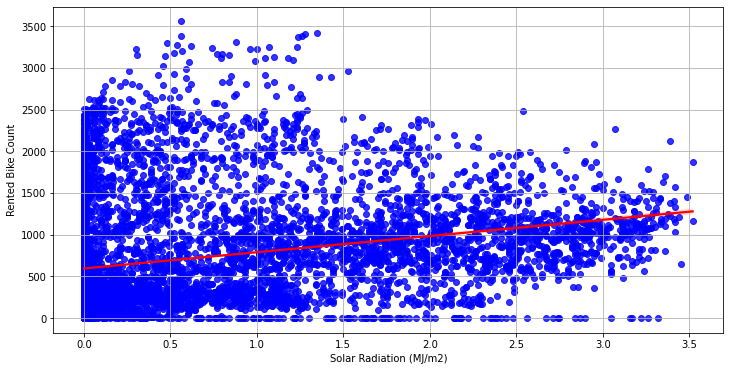

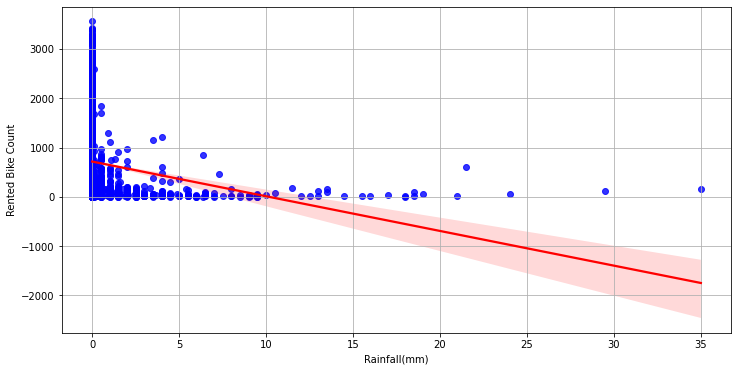

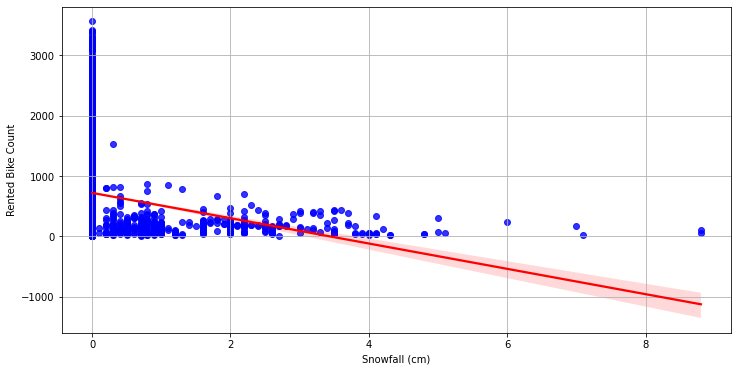

In [ ]:
# Chart - 4 visualization code
# 
numerical_feature = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for feature in numerical_feature:    
  plt.figure(figsize=(12,6))
  sns.regplot(file[feature],file['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "red"})
  plt.xlabel(feature)
  plt.ylabel('Rented Bike Count')
  plt.grid()
  plt.show()



##### 1. Why did you pick the specific chart?

**Answer**  we choose scatter plot because both the feature are numerical in nature.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** following observation were made from the above plot:
<br> (1)with increase in temperature the demand kept increases up to 30 degree celcius after that there is decrease in demand observed.
<br> (2) Demands are high during low solar radiation and it decreases with increase in solar radiation
<br> (3) The maximum demand occurs when there is no rainfall or snowfall, However demand drops significantly if there is any rainfall or snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> (1) The temperature range between 10 to 30 , low solar radiation, no rainfall and snowfall days are ver good for business which will impact the business positively. 
<br> (2) lower temperature, high radiation, snowfall or rainfall could impact our business negatively as from the graph it can be observed that these days the demand is low.

#### Chart - 8 

In [ ]:
def scatterplot_hue(df,col1,col2,target='Rented Bike Count'):
  plt.figure(figsize=(10,5))
  sns.scatterplot(x = df[col1],y = df[target], hue = df[col2])
  plt.xlabel(col1)
  plt.ylabel(target)
  plt.legend()
  plt.grid()
  plt.show()

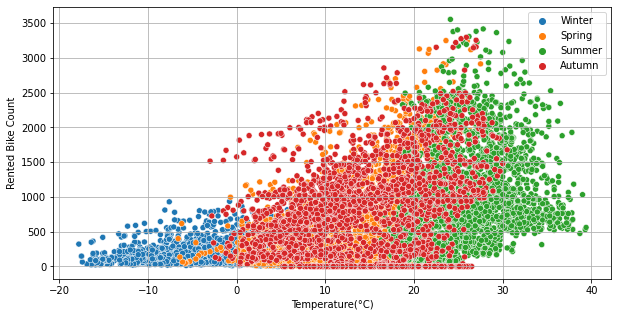

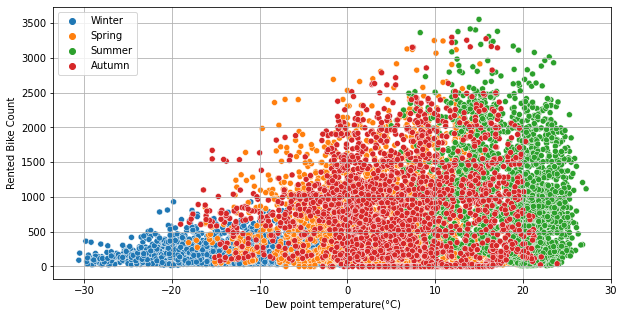

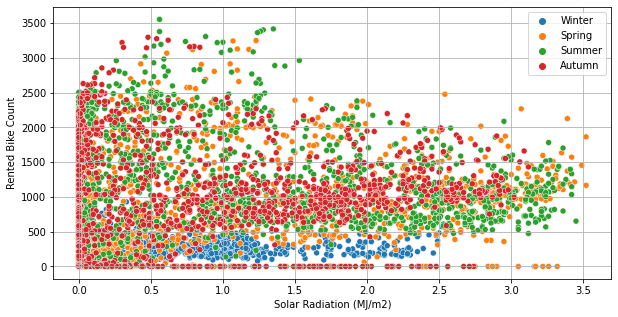

In [ ]:
# Chart - 7 visualization code
scatterplot_hue(file,'Temperature(°C)','Seasons')
scatterplot_hue(file,'Dew point temperature(°C)','Seasons')
scatterplot_hue(file,'Solar Radiation (MJ/m2)','Seasons')

##### 1. Why did you pick the specific chart?

**Answer:** The scatterplot with hue as season gives insight about temperature range in different season along with the demand and the temperature and dew point temperature naure similar from the above plot so we keep these features in one plot.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br> (1) During winter temperature is very low, and so as demand.
<br> (2) Demand is high during spring,summer, automn season.
<br> (3) similar obsevation as temperature can be seen as dew point temperature.
<br> (4) No specific relation is observed from solar radiation and seasons but the demand is high during the low radiation and slightly  low during high radiation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answe:** Summer, spring and automn seasons with low radiation are the time when demands are high which will create the positive impact on the business.
<br> During winter and when radiation is high the demand is very low.

#### Chart - 8

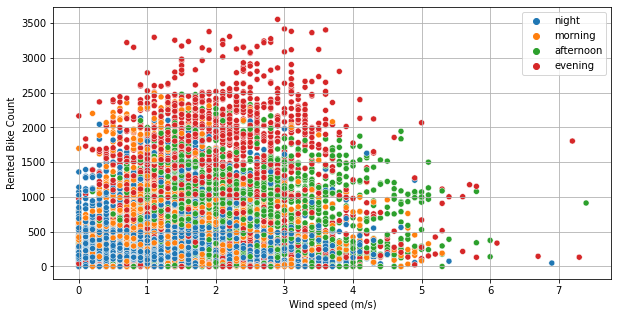

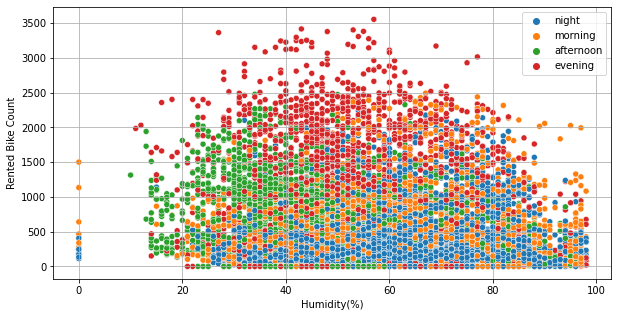

In [ ]:

scatterplot_hue(file,'Wind speed (m/s)','day_time')
scatterplot_hue(file,'Humidity(%)','day_time')

##### 1. Why did you pick the specific chart?

**Answer:** gives better visualization for two numerical feature hued on the categorical feature. Here the plots are rented bike count vs wind speed and humidity hued on the day_time.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** Demands were high at evening , the favourable conditions are when the wind speed and humidity are in of 1 to 4 m/s and 30 to 70%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> At moderate wind speed and humidity the demands are high so favourable conditions for business. However, when wind speed are very low the demands reduces significantly.

#### Chart - 9

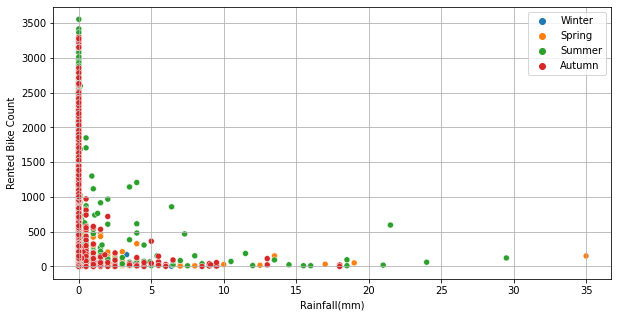

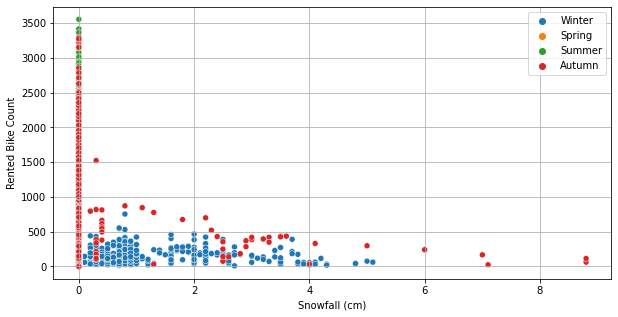

In [ ]:
# Chart - 9 visualization code
scatterplot_hue(file,'Rainfall(mm)','Seasons')
scatterplot_hue(file,'Snowfall (cm)','Seasons')

##### 1. Why did you pick the specific chart?

**Answer** Rainfall and snowfall are similar in nature and both depend on season, so we plot both with respect to demand and hued on season.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br>(1)demands are high when rainfall and snowfall both zero.
<br>(2)most of snowfall takes place in winter season however some snowfall happened in Automn season also.
<br>(3) In summer also there was rainfall of high depth was also observed, which have negative impact on the business.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** The demand is significantly impacted by the rainfall and snowfall. if it happens it is not good for business.

#### Chart - 10 - Correlation Heatmap

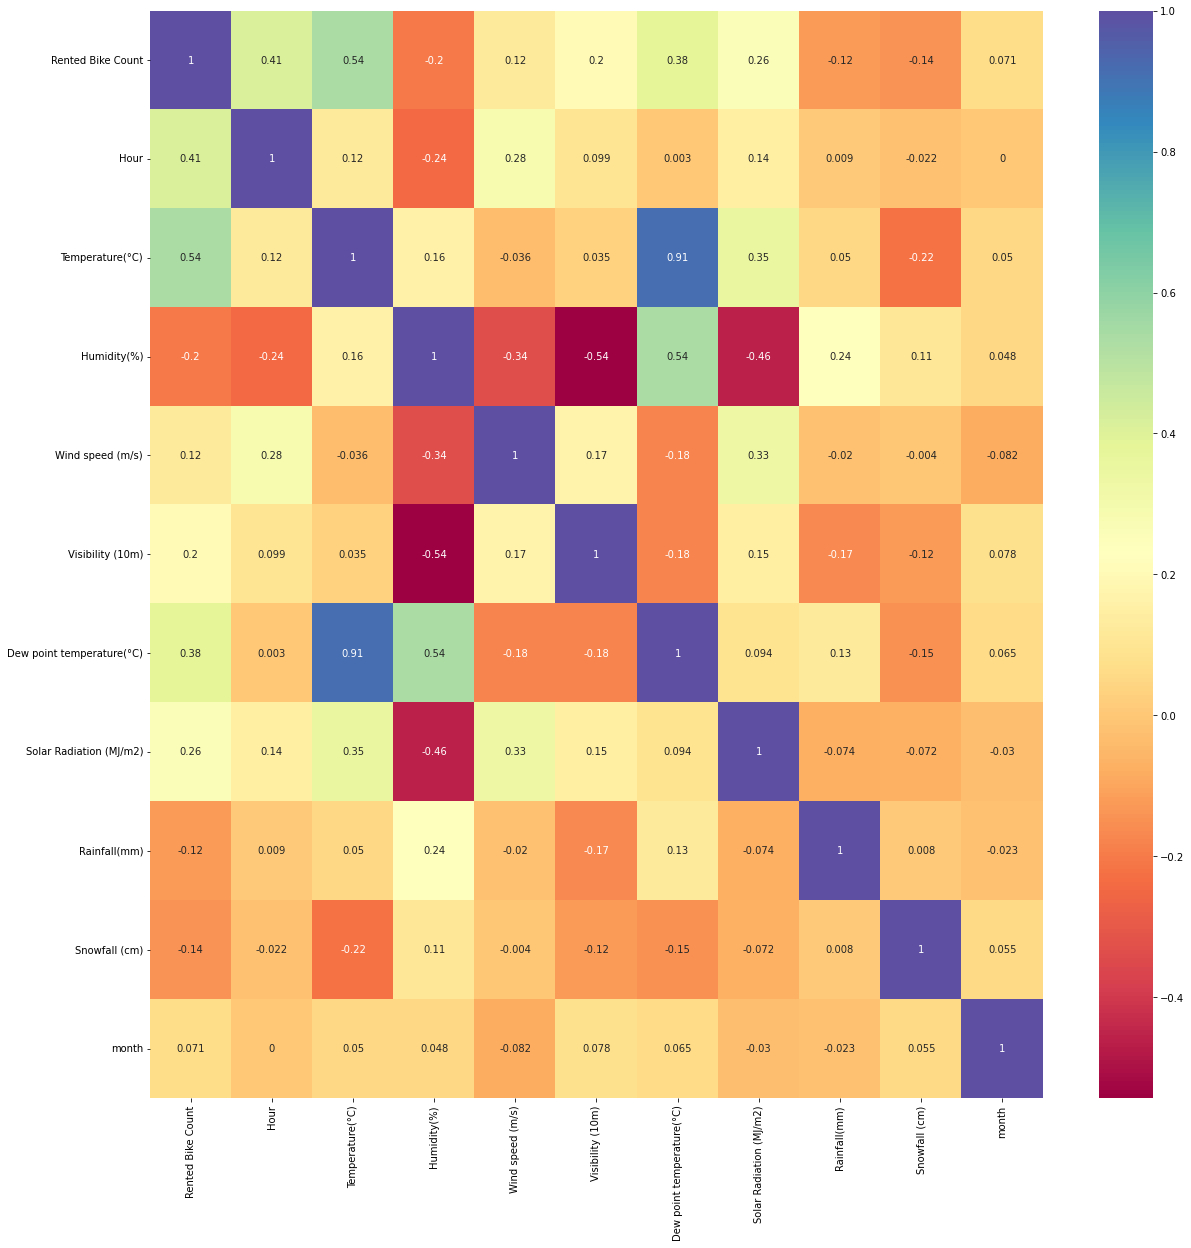

In [ ]:
# Correlation Heatmap visualization code
corr = round(file.corr(),3)
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Spectral",annot=True)

##### 1. Why did you pick the specific chart?

**Answer:** correlation plot shows the relationship of the feature with respect to each other.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** Following are the observation from the correlation matrix heatmap.
<br> (1) The maximum correlation value is 0.91 between temperature and dew point temperature feature.
<br> (2) month feature least impact the demand as it has the least correlation value with the demand.
<br> (3) Rainfall and snowfall impacts negatively to the demand.
<br> (4) Temperature has the maximum correlation value with demand and second highest is hour feature. 

#### Chart - 11 - Pair Plot 

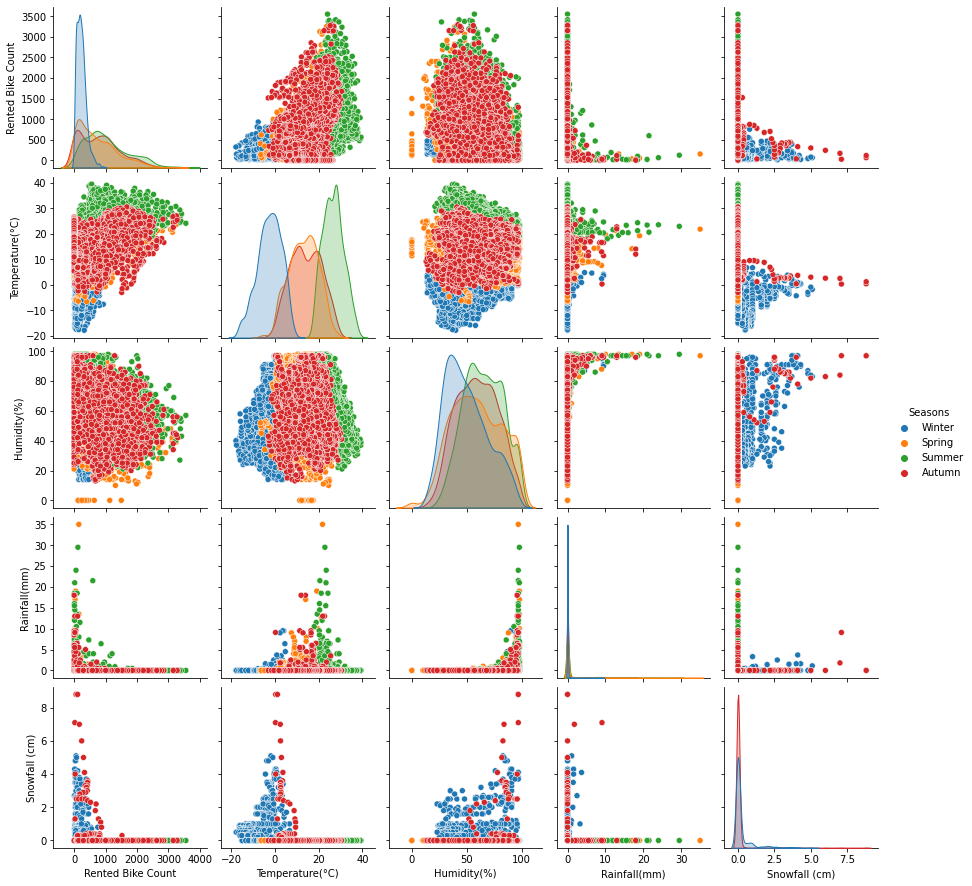

In [ ]:
# Pair Plot visualization code
#Lets simply plot pair plot of just numerical data of distinct type like temperature and dew point temperature are similar so we keep one of them
data = file[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)','Seasons']]
sns.pairplot(data,hue = 'Seasons')

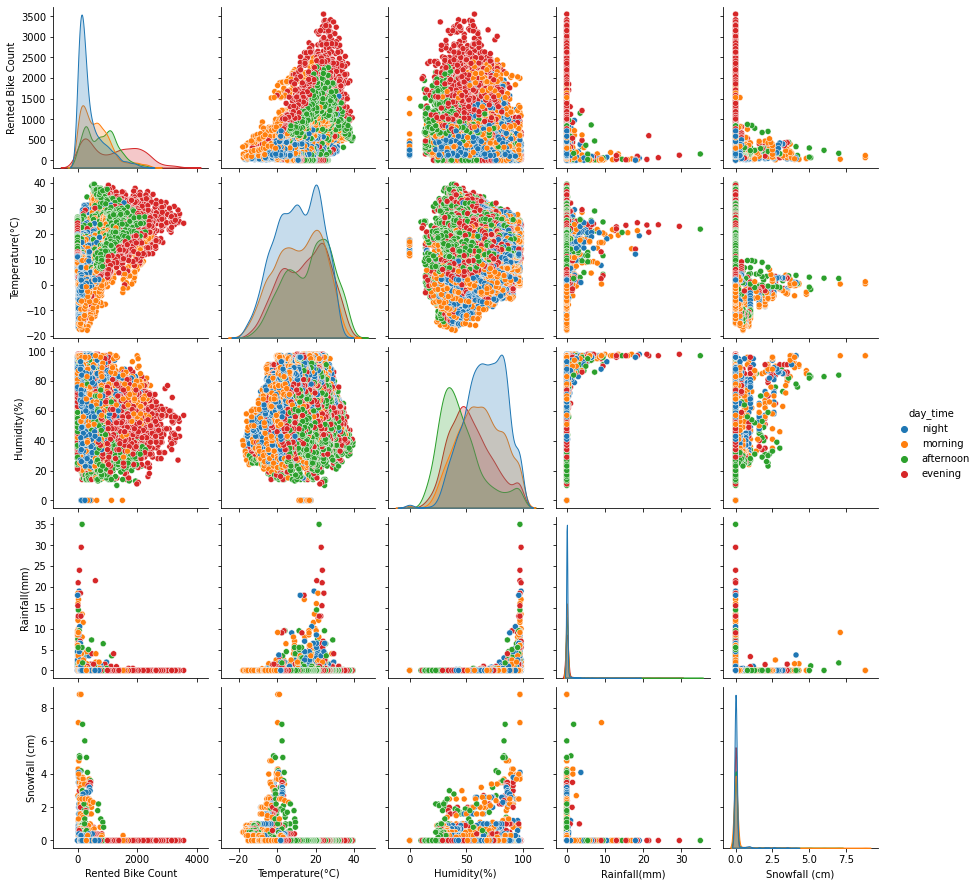

In [ ]:
data = file[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)','day_time']]
sns.pairplot(data,hue = 'day_time')

##### 1. Why did you pick the specific chart?

**Answer:** Pairplot can be used to show multiple feature plots at the same place so it is easy to visualise all feature at one place. Both the plot are similar except the hue feature.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br>(1)demands are high when rainfall and snowfall both zero.
<br>(2)most of snowfall takes place in winter season however some snowfall happened in Automn season also.
<br>(3) In summer also there was rainfall of high depth was also observed, which have negative impact on the business.

**Checking Multicollinearity:**

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     

In [ ]:
#calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bikes']]])
calc_vif(file[[i for i in numerical_feature if i not in ['rented_bikes']]])

,variables,VIF
0,Temperature(°C),29.075866
1,Humidity(%),5.069743
2,Wind speed (m/s),4.517664
3,Visibility (10m),9.051931
4,Dew point temperature(°C),15.201989
5,Solar Radiation (MJ/m2),2.821604
6,Rainfall(mm),1.079919
7,Snowfall (cm),1.118903


**observation :** Since the temperature and dew point temperature has very high value of vif, so lets drop the dew point temperature and check the vif.

In [ ]:
calc_vif(file[[i for i in numerical_feature if i not in ['rented_bikes','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


**Observation :** After removal the Dew point temperature the vif value has improved significatly. so we will drop the dew point temperature from the dataset.

In [ ]:
file.drop(['Dew point temperature(°C)'],axis = 1, inplace =True)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis :** mean Rented Bike Count on holidays are same as the mean Rented Bike Count on not holiday. 
<br> **H0 : mean_holiday - mean_not_holiday = 0**
<br>**Alternate hypothesis:** mean Rented Bike Count on holidays are not same as the mean Rented Bike Count on not holiday.
<br> **HA : mean_holiday - mean_not_holiday != 0**
<br> significance level = 0.05


In [ ]:
## defining a random sample generator.
def randm_sample_gen(data, size):
  import random
  shape = data.shape[0]  # total number of rows
  selected_rows = list(set(np.random.choice(shape, size, replace = True)))   # generates a list of integer value of given size and the value will range in between 0 to shape
  sample_x = [data[ele] for ele in selected_rows]
  return sample_x

#### 2. Perform an appropriate statistical test.

In [ ]:
from statsmodels.stats.weightstats import ztest
no_holiday = file['Rented Bike Count'][file['Holiday'] != 'Holiday'].values
holiday = file['Rented Bike Count'][file['Holiday'] == 'Holiday'].values

In [ ]:
## creating samples of size 100 from each categories
no_holiday_sample = randm_sample_gen(no_holiday, size= 500)
holiday_sample = randm_sample_gen(holiday,size = 500) 

In [ ]:
# Perform Statistical Test to obtain P-Value
# performing z-test

import scipy.stats as stats
import math
ztest ,p_value = ztest(holiday_sample, no_holiday_sample, value=0)
print(float(p_value))
print("p_value :",p_value)
if p_value < 0.025:   # since it is two tailed test the comparision will be from alpha/2
  print("Reject the null hypothesis")
else:
  print("Accept the null hypothesis")

7.864113063146822e-07
p_value : 7.864113063146822e-07
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**Answer:**<br> In null hypothesis we are testing hypothesis that mean demand on holidays are same as on not holidays. so, it involves like equality symbols. so it will come under the two tailed test.
<br> performed two tailed ztest to proove the hypothesis.


##### Why did you choose the specific statistical test?

**Answer :** in case of mean value comparision we usually go for t-test or z-test, In this case our sample size is larger than 30 so we went for z-test.
<br> The p-value is less than the significance value so we reject the null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<br>Null hypothesis: Rental Bike count is same in all seasons.
<br>Alternate hypothesis : Rental Bike count is not same in all seasons.

#### 2. Perform an appropriate statistical test.

In [ ]:
summ_demand = file['Rented Bike Count'][file['Seasons'] != 'Summer'].values
win_demand = file['Rented Bike Count'][file['Seasons'] != 'Winter'].values
spr_demand = file['Rented Bike Count'][file['Seasons'] != 'Spring'].values
Aut_demand = file['Rented Bike Count'][file['Seasons'] != 'Autumn'].values

In [ ]:
# creating samples for each hypothesis 
summ_dem_sam = randm_sample_gen(summ_demand, size=300)
win_dem_sam = randm_sample_gen(win_demand, size=300)
spr_dem_sam = randm_sample_gen(spr_demand, size=300)
Aut_dem_sam = randm_sample_gen(Aut_demand, size=300)  # creating samples of size 300

In [ ]:
# Perform Statistical Test to obtain P-Value


# Anova test since we comparing a feature having four categories
F, p_value = stats.f_oneway(summ_dem_sam, win_dem_sam,spr_dem_sam,Aut_dem_sam)
print("p_value :",p_value)
if p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Accept the null hypothesis")

p_value : 1.1254319823032042e-05
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**Answer:** Anova test

##### Why did you choose the specific statistical test?

**Answer:** Since we comparing values of four data group i.e., categorical feature has four category. For categorical feature having more than two category annova test is suitable.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Lets perform normality test on the target variable by using the graphical (quantile - quantile plot) and statistically using normal Test.

<br> **Null hypothesis:** Rented bike count follows normal distribution
<br> **Alternate hypothesis:** Rented bike count does not follow the normal distribution.

#### 2. Perform an appropriate statistical test.

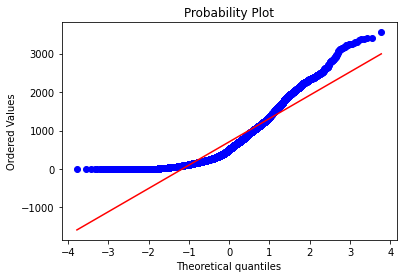

In [ ]:
## Graphical method using quantile quantile plot
data = file['Rented Bike Count']
stats.probplot(data, plot=plt)
plt.show()

**observation :** the curve is not linear, so the rented bike demand seems to not have gaussian distribution.

In [ ]:
# Perform Statistical Test to obtain P-Value
stat,p_value = stats.normaltest(data)
print("p_value :",p_value)
if p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Accept the null hypothesis")

p_value : 3.779491395679156e-308
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**Answer Here:** performed normality test to calculate p-value.

##### Why did you choose the specific statistical test?

**Answer Here:** To test data is normal distributed or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
file.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
day                          0
month                        0
day_time                     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Answer:** Since there is no missing value, we donot need to impute any value.

### 2. Handling Outliers

In [ ]:
#  1) using interquartile ranges 
def OutlierRemovaIQR(df,col):
  try:
    first_Quartile = df[col].quantile(0.25)
    third_Quartile = df[col].quantile(0.75)
    IQR = third_Quartile - first_Quartile
    low_lim = first_Quartile - 1.5 * IQR
    # considering minimum trip_duration of 15 second atleast
    if low_lim >=0:
      lower_lim = low_lim
    else:
      lower_lim = 0
    upper_limit = third_Quartile + 1.5* IQR
  
    df1 = df[(df[col]>lower_lim) & (df[col] < upper_limit)]
    data_loss = df.shape[0]-df1.shape[0]
    print("data loss by IQR method ", data_loss*100/df.shape[0])
    return df1
  except Exception as e:
    return e

In [ ]:
data1 = OutlierRemovaIQR(file,'Rented Bike Count')

data loss by IQR method  5.171232876712328


In [ ]:
data1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,day_time
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night


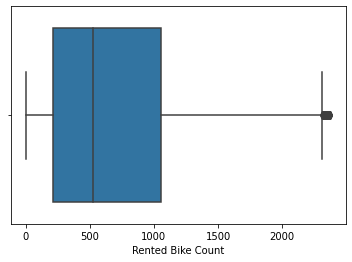

In [ ]:
sns.boxplot(data1['Rented Bike Count'])

**observation:** All functioning day have some demand of bike.

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Answer Here:** The distribution is not normal so we use inter quartile proximity rule.

### 3. Categorical Encoding

In [ ]:
data1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'day', 'month', 'day_time'],
      dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8307 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8307 non-null   int64  
 1   Hour                     8307 non-null   int64  
 2   Temperature(°C)          8307 non-null   float64
 3   Humidity(%)              8307 non-null   int64  
 4   Wind speed (m/s)         8307 non-null   float64
 5   Visibility (10m)         8307 non-null   int64  
 6   Solar Radiation (MJ/m2)  8307 non-null   float64
 7   Rainfall(mm)             8307 non-null   float64
 8   Snowfall (cm)            8307 non-null   float64
 9   Seasons                  8307 non-null   object 
 10  Holiday                  8307 non-null   object 
 11  Functioning Day          8307 non-null   object 
 12  day                      8307 non-null   object 
 13  month                    8307 non-null   int64  
 14  day_time                

In [ ]:
# Encode your categorical columns
categorical_feat=['Seasons', 'Holiday', 'Functioning Day', 'day', 'day_time','month','Hour']
categorical_feat

['Seasons', 'Holiday', 'Functioning Day', 'day', 'day_time', 'month', 'Hour']

In [ ]:
#creat a copy
bike_df = data1

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_feat:
    bike_df = one_hot_encoding(bike_df, col)
bike_df.head()
     

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Answer Here:** we have 7 categorical feature, on that we use one hot encoding using pandas get_dummies function.

### 4. Data Transformation : Train Test split

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
y = bike_df['Rented Bike Count']
x = bike_df.drop('Rented Bike Count',axis=1)
print(" The shape of x and y are", y.shape, 'and', x.shape)

 The shape of x and y are (8307,) and (8307, 54)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
print("the shape of x_train is",x_train.shape, "and y_train is",y_train.shape)
print("the shape of x_test is",x_test.shape, "and y_test is",y_test.shape)

the shape of x_train is (6230, 54) and y_train is (6230,)
the shape of x_test is (2077, 54) and y_test is (2077,)


### 6. Data Scaling

In [ ]:
# Scaling your data
## To remove scale effect lets normalize all the independent variable using MinMaxScalar()
scaler = MinMaxScaler()
x_train_final = scaler.fit_transform(x_train)
x_test_final = scaler.transform(x_test)

In [ ]:
x_train_final[:5]

array([[0.22183099, 0.26530612, 0.42465753, 0.94272681, 0.25284091,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.86795775, 0.5       , 0.47945205, 0.71059301, 0.83238636,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0. 

##### Which method have you used to scale you data and why?

**Answer:** we use min max scalar which will scale all the feature in 0 to 1, which will remove the effect of scaling.

## ***7. ML Model Implementation***
<br> In this section we will train bunch of machine learning models along with the hyperparameter tuning. The models we train are following:
<br> (1) Baseline model
<br> (2) Linear regression
<br> (3) Lasso regression
<br> (4) Ridge Regressor
<br> (5) Decision tree
<br> (6) Random forest
<br> (7) xgboost

**Evaluation metrics:**
<br> 1. RMSE :square root of the averaged squared difference between the target value and the value predicted by model. 
<br> 2. R**2 or coefficient of determination : Helps to compare our model with the baseline model.
<br> 3. MAPE: mean of ratio of absolute difference between the actual and predicted to the actual value.

In [ ]:
def performance_metrics(y_train,y_train_pred,y_test,y_test_pred):
  try:
    rmse_base_train = math.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_base_test = math.sqrt(mean_squared_error(y_test,y_test_pred))
    print("rmse for train is:",rmse_base_train)
    print("rmse for test is:",rmse_base_test)
    print("*"*50)

    # r2 error
    r2_train_b = r2_score(y_train,y_train_pred)
    r2_test_b = r2_score(y_test,y_test_pred)
    print("r2_square for train is:", r2_train_b)
    print("r2_square for test is:", r2_test_b)
    print("*"*50)

    # mean_absolute_percentage_error
    MAPE_train_b = mean_absolute_percentage_error(y_train,y_train_pred)
    MAPE_test_b = mean_absolute_percentage_error(y_test,y_test_pred)
    print("MAPE score for train:",MAPE_train_b)
    print("MAPE score for test:", MAPE_test_b)
  except Exception as e:
    print(e)

### ML Model - 1 : Baseline Model
<br> In this model, for each set of value the model will give the mean of the target values at train set as predicted output.

In [ ]:
# ML Model - 1 Implementation
def fit(x_train,y_train):
  try:
    return y_train.mean()
  except Exception as e:
    return e

# Fit the Algorithm
fit = fit(x_train_final,y_train)
# Predict on the model
def predict(x_test,fit):
  try:
    return np.full(x_test.shape[0],fit)
  except Exception as e:
    return e

y_train_pred = predict(x_train_final,fit)
y_test_pred = predict(x_test_final,fit)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

performance_metrics(y_train,y_train_pred,y_test,y_test_pred)

rmse for train is: 586.9264830653626
rmse for test is: 583.4596601848169
**************************************************
r2_square for train is: 0.0
r2_square for test is: -0.0001142971620311517
**************************************************
MAPE score for train: 3.3947465207053007
MAPE score for test: 3.0279768196032855


**observation :** 
<br> (1) r2 value for train is 0 because in numerator and denomenator both we have the MSE value of baseline, so the ratio is equal to one.
<br> (2) r2 value for test is negative because MSE value for model which is predicting avergage of train target value is greater than the MSE for baseline model.

### ML Model - 2 : Linear Regression
<br> Linear regression is type of supervised machine learning algorithm. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x) by fitting a linear relationship.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
try:
  lr = LinearRegression()
  lr.fit(x_train_final,y_train)
  y_train_pred_lr = lr.predict(x_train_final)
  y_test_pred_lr = lr.predict(x_test_final)
except Exception as e:
     print(e)


In [ ]:
performance_metrics(y_train,y_train_pred_lr,y_test,y_test_pred_lr)

rmse for train is: 337.632759593665
rmse for test is: 339.45451009665675
**************************************************
r2_square for train is: 0.669080968358406
r2_square for test is: 0.6614746991230109
**************************************************
MAPE score for train: 1.6322623181214428
MAPE score for test: 1.543771111166036


#### 2. Cross- Validation & Hyperparameter Tuning : 
<br> In simple linear regression,we donot have any hyperparameter to fine tune.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Answer Here** 
<br> All the three metrics shows the significant improvement over the Baseline model.

### ML Model - 3. Lasso Regression
<br> It stands for least absolute shrinkage and selection operator. In this regression method, we minimize the sum of RSS and a "penalty term" which is L1 regularization.
<br> In simple term, It is linear regression with l1 regularization

In [ ]:
try:
  # ML Model - 3 Implementation
  lasso  = Lasso(random_state = 42)   # default alpha = 1, fit_intercept =True

  # Fit the Algorithm
  las_reg = lasso.fit(x_train_final,y_train)

  # Predict on the model
  y_train_las_score = las_reg.predict(x_train_final)
  y_test_las_score = las_reg.predict(x_test_final)
except Exception as e:
  print(e)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
performance_metrics(y_train,y_train_las_score,y_test,y_test_las_score)

rmse for train is: 340.9348210757347
rmse for test is: 340.3274301347085
**************************************************
r2_square for train is: 0.6625765143068019
r2_square for test is: 0.6597313994377865
**************************************************
MAPE score for train: 1.6077664647097984
MAPE score for test: 1.4946024953014432


**Observation :**<br> With defualt parameter, Lasso regression performs similar to the linear regression although there is little variation in score i.e., rmse value is less for linear regression and r2_square and MAPE score is less for Lasso regression.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
las = Lasso(fit_intercept = True, random_state = 42)
parameter = {'alpha' : [10**i for i in range(-3,3)]}
clf_las = GridSearchCV(las,parameter, scoring = 'neg_root_mean_squared_error',n_jobs = -1, refit = True, cv = 5 ,return_train_score = True)

# Fit the Algorithm
clf_las.fit(x_train_final,y_train)
results_lass = pd.DataFrame(clf_las.cv_results_)
# Predict on the model


In [ ]:
results_lass

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.388153,0.009291,0.003050,0.003150,0.001,{'alpha': 0.001},-337.178732,-346.041305,-346.466020,-338.483863,...,-341.556661,3.914039,3,-338.428021,-336.069915,-335.854726,-337.931529,-337.684248,-337.193688,1.035792
1,0.372355,0.010926,0.001493,0.001224,0.01,{'alpha': 0.01},-337.167447,-346.067184,-346.457329,-338.470261,...,-341.553019,3.923510,2,-338.428541,-336.070417,-335.855257,-337.932019,-337.684763,-337.194199,1.035788
2,0.092628,0.025521,0.000901,0.000031,0.1,{'alpha': 0.1},-337.043491,-346.354052,-346.395081,-338.389829,...,-341.546648,4.021090,1,-338.477505,-336.117619,-335.904153,-337.976574,-337.731943,-337.241559,1.035392
3,0.033279,0.003010,0.000815,0.000045,1,{'alpha': 1},-337.749085,-350.593718,-349.751636,-339.844698,...,-343.941379,5.250993,4,-341.807860,-339.074807,-339.443591,-341.109167,-340.997893,-340.486664,1.046496
4,0.013866,0.002544,0.000797,0.000097,10,{'alpha': 10},-386.991071,-406.118436,-398.520112,-379.166592,...,-390.452948,10.301193,5,-390.728740,-387.638444,-386.665737,-391.424206,-389.976816,-389.286788,1.828161
5,0.006846,0.002969,0.002312,0.003375,100,{'alpha': 100},-570.620012,-565.441573,-569.265783,-555.203430,...,-566.641208,6.186933,6,-567.620029,-563.947435,-564.954554,-570.661859,-565.047807,-566.446337,2.432036


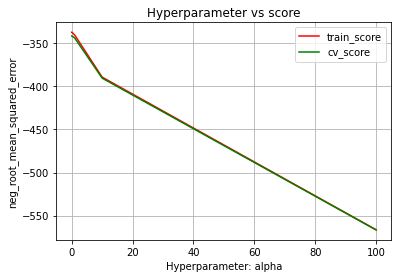

In [ ]:
alpha = results_lass['param_alpha']
train_score = results_lass['mean_train_score']
cv_score = results_lass['mean_test_score']
plt.plot(alpha, train_score, 'r',label = 'train_score')
plt.plot(alpha,cv_score,'g',label = 'cv_score')
plt.xlabel("Hyperparameter: alpha")
plt.ylabel("neg_root_mean_squared_error")
plt.title("Hyperparameter vs score")
plt.legend()
plt.grid()
plt.show()

In [ ]:
clf_las.best_params_

{'alpha': 0.1}

In [ ]:
y_train_clf_lasso = clf_las.predict(x_train_final)
y_test_clf_lasso = clf_las.predict(x_test_final)
performance_metrics(y_train,y_train_clf_lasso,y_test,y_test_clf_lasso)

rmse for train is: 337.68191600213737
rmse for test is: 339.16252484899064
**************************************************
r2_square for train is: 0.6689846034484236
r2_square for test is: 0.6620568206142505
**************************************************
MAPE score for train: 1.6262184330941512
MAPE score for test: 1.5385498304097995


##### Which hyperparameter optimization technique have you used and why?

**Answer Here:**
<br> used GridSearchCV with cv =5, used GridSearch because it trains the model with all possible combination of given hyperparameter and trains with the best estimator observed.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer Here:** No there is no significant improvement were observed and the best lasso model performs as good as the normal linear regression model.

####   ML Model - 4. Ridge Regression
<br> In this regression method, we minimize the sum of RSS and a "penalty term" which is L2 regularization.

In [ ]:
try:
  # ML Model - 3 Implementation
  ridge  = Ridge(random_state = 42)   # default alpha = 1, fit_intercept =True

  # Fit the Algorithm
  rid_reg = ridge.fit(x_train_final,y_train)

  # Predict on the model
  y_train_rid_score = rid_reg.predict(x_train_final)
  y_test_rid_score = rid_reg.predict(x_test_final)
except Exception as e:
  print(e)

In [ ]:
performance_metrics(y_train,y_train_rid_score,y_test,y_test_rid_score)

rmse for train is: 337.7476912195859
rmse for test is: 338.778561740016
**************************************************
r2_square for train is: 0.6688556375243452
r2_square for test is: 0.6628215528914996
**************************************************
MAPE score for train: 1.6211117412980396
MAPE score for test: 1.529457897889712


**Observation :**<br> With defualt parameter, Ridge regression performs similar to the linear regression and Lasso regression although there is little variation in score i.e., rmse value is less for linear regression and r2_square and MAPE score is less for Lasso regression.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rid = Ridge(fit_intercept = True, random_state = 42)
parameter = {'alpha' : [10**i for i in range(-3,3)]}
clf_rid = GridSearchCV(rid,parameter, scoring = 'neg_root_mean_squared_error',n_jobs = -1, refit = True, cv = 5 ,return_train_score = True)

# Fit the Algorithm
clf_rid.fit(x_train_final,y_train)
results_rid = pd.DataFrame(clf_rid.cv_results_)
# Predict on the model


In [ ]:
results_rid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006832,0.001012,0.001253,0.001101,0.001,{'alpha': 0.001},-337.178877,-346.038325,-346.466886,-338.485109,...,-341.556819,3.913196,3,-338.428017,-336.069911,-335.854722,-337.931525,-337.684243,-337.193684,1.035792
1,0.005800,0.000743,0.000713,0.000034,0.01,{'alpha': 0.01},-337.168461,-346.041433,-346.464700,-338.488816,...,-341.555536,3.915172,2,-338.428046,-336.069932,-335.854749,-337.931543,-337.684266,-337.193707,1.035792
2,0.005529,0.000328,0.000764,0.000139,0.1,{'alpha': 0.1},-337.070227,-346.073548,-346.446756,-338.525731,...,-341.545302,3.934916,1,-338.430849,-336.071967,-335.857308,-337.933265,-337.686507,-337.195979,1.035814
3,0.008683,0.001728,0.000790,0.000051,1,{'alpha': 1},-336.531474,-346.468604,-346.546408,-338.879146,...,-341.631325,4.117075,4,-338.636415,-336.228431,-336.044931,-338.069653,-337.855355,-337.366957,1.038059
4,0.006867,0.000663,0.000762,0.000030,10,{'alpha': 10},-339.275318,-350.975625,-350.860133,-341.421073,...,-345.101046,4.892593,5,-342.578021,-339.825156,-339.724003,-341.568809,-341.482798,-341.035757,1.099893
5,0.010830,0.003486,0.000878,0.000310,100,{'alpha': 100},-360.664534,-377.177816,-371.769875,-357.620264,...,-365.684688,7.477326,6,-364.076325,-361.013528,-361.118964,-363.818309,-363.330104,-362.671446,1.332794


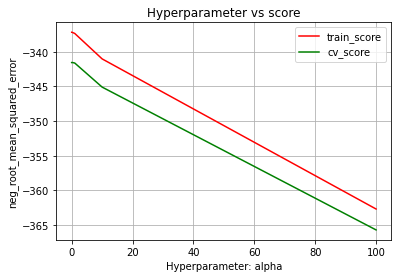

In [ ]:
alpha = results_rid['param_alpha']
train_score = results_rid['mean_train_score']
cv_score = results_rid['mean_test_score']
plt.plot(alpha, train_score, 'r',label = 'train_score')
plt.plot(alpha,cv_score,'g',label = 'cv_score')
plt.xlabel("Hyperparameter: alpha")
plt.ylabel("neg_root_mean_squared_error")
plt.title("Hyperparameter vs score")
plt.legend()
plt.grid()
plt.show()

In [ ]:
clf_rid.best_params_

{'alpha': 0.1}

In [ ]:
y_train_clf_ridge = clf_rid.predict(x_train_final)
y_test_clf_ridge = clf_rid.predict(x_test_final)
performance_metrics(y_train,y_train_clf_ridge,y_test,y_test_clf_ridge)

rmse for train is: 337.63427735102715
rmse for test is: 339.35387742208616
**************************************************
r2_square for train is: 0.6690779931973105
r2_square for test is: 0.6616753837851197
**************************************************
MAPE score for train: 1.6308384497818564
MAPE score for test: 1.5419786471339914


##### Which hyperparameter optimization technique have you used and why?

**Answer Here:**
<br> used GridSearchCV with cv =5, used GridSearch because it trains the model with all possible combination of given hyperparameter and trains with the best estimator observed.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer Here:** No there is no significant improvement were observed and all three Ridge, lasso, linear regression performs very similar.

####   ML Model - 5. Decision Tree Regressor


In [ ]:
try:
  # ML Model - 3 Implementation
  DTC  = DecisionTreeRegressor(random_state = 42)   # default value

  # Fit the Algorithm
  DTC.fit(x_train_final,y_train)

  # Predict on the model
  y_train_dtc = DTC.predict(x_train_final)
  y_test_dtc = DTC.predict(x_test_final)
except Exception as e:
  print(e)

In [ ]:
performance_metrics(y_train,y_train_dtc,y_test,y_test_dtc)

rmse for train is: 0.0
rmse for test is: 283.3789924221137
**************************************************
r2_square for train is: 1.0
r2_square for test is: 0.7640808092086847
**************************************************
MAPE score for train: 0.0
MAPE score for test: 0.5585684833363821


In [ ]:
DTC.get_depth()

38

**observation:** Since with the default values of Decision tree it is overfitting severely, so lets use hyperparameter tuning.

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

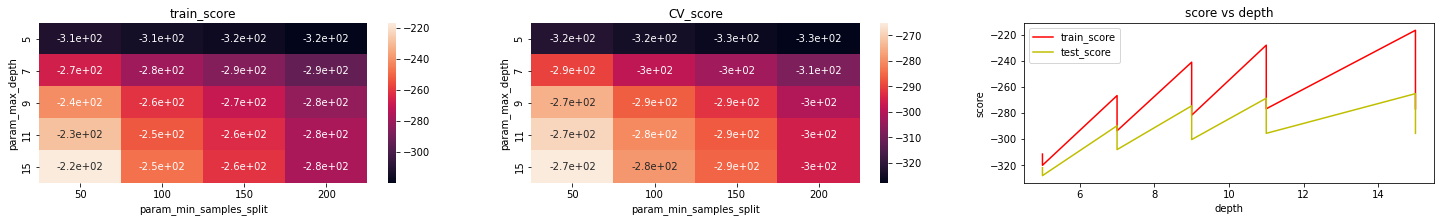

----------------------------------------------------------------------------------------------------
The best parameters are: {'max_depth': 15, 'min_samples_split': 50}
The scores on best parameters are:
rmse for train is: 211.99994152654355
rmse for test is: 255.57580661305047
**************************************************
r2_square for train is: 0.8695319803844049
r2_square for test is: 0.8081033264083848
**************************************************
MAPE score for train: 0.5819895413928784
MAPE score for test: 0.6885989877907228


In [ ]:
try:
  parameter = {'max_depth' : [5,7,9,11,15], 'min_samples_split' : [50,100,150,200]}

  DTC = DecisionTreeRegressor(random_state = 42)
  print(DTC.get_params().keys())
  clf = GridSearchCV(DTC, parameter, cv =3, scoring ='neg_root_mean_squared_error', refit=True, return_train_score=True)
  clf.fit(x_train_final, y_train)

  results = pd.DataFrame.from_dict(clf.cv_results_)
  #print(results.head())
  
  train_score_dt = results['mean_train_score']
  test_score_dt = results['mean_test_score']
  best_max_depth = results['param_max_depth']
  print("-"*100)
  # Lets plot the results
  plt.figure(1)
  plt.figure(figsize=(25,10))

  #heatmap 
  plt.subplot(331)
  dataset_train = results.pivot('param_max_depth', 'param_min_samples_split', 'mean_train_score')
  ax = sns.heatmap(dataset_train, annot=True)
  plt.title('train_score')

  plt.subplot(332)
  dataset_train = results.pivot('param_max_depth', 'param_min_samples_split', 'mean_test_score')
  ax = sns.heatmap(dataset_train, annot=True)
  plt.title('CV_score')
  
  plt.subplot(333)
  plt.plot(best_max_depth,train_score_dt,'r',label = 'train_score')
  plt.plot(best_max_depth,test_score_dt,'y',label ='test_score')
  plt.xlabel('depth')
  plt.ylabel('score')
  plt.title('score vs depth')
  plt.legend()
  plt.show()

  print("-"*100)
  print("The best parameters are:",clf.best_params_)
  print("The scores on best parameters are:")
  y_train_pred_dtr = clf.predict(x_train_final)
  y_test_pred_dtr = clf.predict(x_test_final)
  performance_metrics(y_train,y_train_pred_dtr,y_test,y_test_pred_dtr)
except Exception as e:
    print(e)


**Observation:**
<br> (1) The best parameters are: (max_depth = 15, min_samples_split = 50)
<br> (2) performs better than linear,Lasso and Ridge regressiom. 


####   ML Model - 6. Random Forest Regressor

In [ ]:
try:
  # ML Model - 3 Implementation
  # since the best params in case of decision trees are max_depth = 15, min_samples_split = 50, the models were overfitting so to overcome this problem train random forest with n_estimators = 200 .
  rf  = RandomForestRegressor(max_depth = 15, n_estimators = 200, min_samples_split = 50, random_state = 42)   

  # Fit the Algorithm
  rf.fit(x_train_final,y_train)

  # Predict on the model
  y_train_rf = rf.predict(x_train_final)
  y_test_rf = rf.predict(x_test_final)
  performance_metrics(y_train,y_train_rf,y_test,y_test_rf)
except Exception as e:
  print(e)

rmse for train is: 200.6083362341976
rmse for test is: 228.8008644361433
**************************************************
r2_square for train is: 0.8831764121310215
r2_square for test is: 0.8462046204582897
**************************************************
MAPE score for train: 0.6219644404175342
MAPE score for test: 0.6402246245476163


**observation :** for the same parameters with n_estimators = 200, the random forest regressor perform much better than the Decision trees with less overfitting. 

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

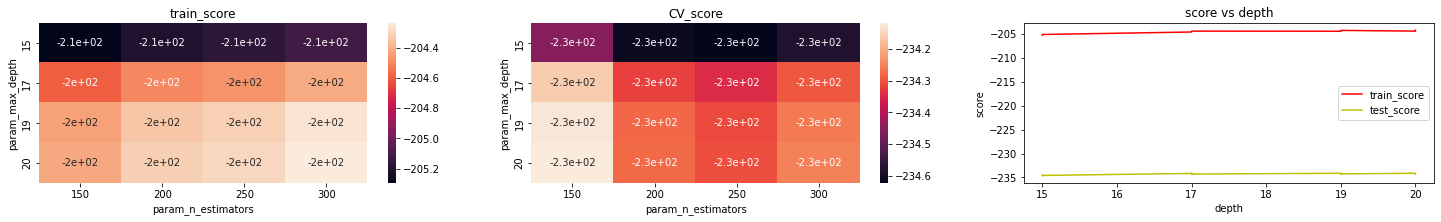

----------------------------------------------------------------------------------------------------
The best parameters are: {'max_depth': 20, 'min_samples_split': 50, 'n_estimators': 150}
The scores on best parameters are:
rmse for train is: 199.1111658852723
rmse for test is: 227.7448794003337
**************************************************
r2_square for train is: 0.8849136494218928
r2_square for test is: 0.8476209686377454
**************************************************
MAPE score for train: 0.6185524420841144
MAPE score for test: 0.6355195116014836


In [ ]:
# In random forest, we train high variance decision trees so lets keep all the depth greater than and equal to 15, with varing number of n_estimators
try:
  parameter = {'max_depth' : [15,17,19,20], 'n_estimators':[150,200,250,300],'min_samples_split': [50] }

  rf1 = RandomForestRegressor(random_state = 42)
  print(rf1.get_params().keys())
  clf = GridSearchCV(rf1, parameter, cv =5, scoring ='neg_root_mean_squared_error', refit=True, return_train_score=True)
  clf.fit(x_train_final, y_train)

  results = pd.DataFrame.from_dict(clf.cv_results_)
  #print(results.head())
  
  train_score_rf = results['mean_train_score']
  test_score_rf = results['mean_test_score']
  best_max_depth = results['param_max_depth']
  print("-"*100)
  # Lets plot the results
  plt.figure(1)
  plt.figure(figsize=(25,10))

  #heatmap 
  plt.subplot(331)
  dataset_train = results.pivot('param_max_depth', 'param_n_estimators', 'mean_train_score')
  ax = sns.heatmap(dataset_train, annot=True)
  plt.title('train_score')

  plt.subplot(332)
  dataset_test = results.pivot('param_max_depth', 'param_n_estimators', 'mean_test_score')
  ax = sns.heatmap(dataset_test, annot=True)
  plt.title('CV_score')
  
  plt.subplot(333)
  plt.plot(best_max_depth,train_score_rf,'r',label = 'train_score')
  plt.plot(best_max_depth,test_score_rf,'y',label ='test_score')
  plt.xlabel('depth')
  plt.ylabel('score')
  plt.title('score vs depth')
  plt.legend()
  plt.show()

  print("-"*100)
  print("The best parameters are:",clf.best_params_)
  print("The scores on best parameters are:")
  y_train_pred_rf1 = clf.predict(x_train_final)
  y_test_pred_rf1 = clf.predict(x_test_final)
  performance_metrics(y_train,y_train_pred_rf1,y_test,y_test_pred_rf1)
  
except Exception as e:
    print(e)

**observation:** Not much improvement than the best decision tree model, but the train score and test score difference is lower, so random forest can be seen as better model than Decision Tree.

####  ML Model 7- Xgboost

In [ ]:
# in gradient boosting we train high bias low variance model, so will train decision trees of low depth.
try:
  xgbr1 = XGBRegressor(random_state = 42)
  parameter = {'max_depth' : [1,2,3,4,5], 'n_estimators':[300,350,500,700],'min_samples_split': [50,100,150], 'learning_rate' :[0.05,0.07,0.1]}
  # using GridSearchCV will have 4*4*3*4 =192 models so will use RandomizedSearchCv for just 10 models to find the hyperparameter 
  rand = RandomizedSearchCV(estimator = xgbr1, param_distributions = parameter, random_state= 42,n_jobs = -1, return_train_score = True)
  rand.fit(x_train_final,y_train)
  results_xgb = pd.DataFrame(rand.cv_results_)
except Exception as e:
  print(e)

[05:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rand.best_estimator_

XGBRegressor(learning_rate=0.07, max_depth=5, min_samples_split=150,
             n_estimators=500, random_state=42)

In [ ]:
rand.best_params_

{'n_estimators': 500,
 'min_samples_split': 150,
 'max_depth': 5,
 'learning_rate': 0.07}

In [ ]:
y_train_pred_x = rand.predict(x_train_final)
y_test_pred_x = rand.predict(x_test_final)
performance_metrics(y_train,y_train_pred_x,y_test,y_test_pred_x)

rmse for train is: 117.98729897456606
rmse for test is: 198.7708187031431
**************************************************
r2_square for train is: 0.9595886735101513
r2_square for test is: 0.8839264627740736
**************************************************
MAPE score for train: 0.2915337017471596
MAPE score for test: 0.4752556967715607


**observation :** best performing model till now, However looking at score it seems to overfit a little.

####  Final Table:


In [ ]:
from prettytable import PrettyTable

Table = PrettyTable()

Table.field_names = ["Model","Train RMSE", "Test RMSE", 'Train r2', 'Test r2', 'Train MAPE','Test MAPE']
Table.add_row(["Baseline Model", "586.9265", '583.4597','0','-0.0001','3.3947','3.0280'])
Table.add_row(["linear regression","337.6327", "339.4545","0.6691",'0.6615','1.6323','1.5438'])             
Table.add_row(["Lasso regression", "337.6819","339.1625", "0.6689",'0.6621','1.6262','1.5385'])
Table.add_row(["Ridge regression", "337.6343", "339.3539","0.6691",'0.6616','1.6308','1.5419'])
Table.add_row(["Decision Tree Regression","211.9999", "255.5758","0.8695",'0.8081','0.5819','0.6886'])
Table.add_row(["Random Forest Regression","199.1112", "227.7449","0.8849",'0.8476','0.6186','0.6355'])             
Table.add_row(["xgboost", "117.9873","198.7708", "0.9596",'0.8839','0.2915','0.4753'])



print(Table)

+--------------------------+------------+-----------+----------+---------+------------+-----------+
|          Model           | Train RMSE | Test RMSE | Train r2 | Test r2 | Train MAPE | Test MAPE |
+--------------------------+------------+-----------+----------+---------+------------+-----------+
|      Baseline Model      |  586.9265  |  583.4597 |    0     | -0.0001 |   3.3947   |   3.0280  |
|    linear regression     |  337.6327  |  339.4545 |  0.6691  |  0.6615 |   1.6323   |   1.5438  |
|     Lasso regression     |  337.6819  |  339.1625 |  0.6689  |  0.6621 |   1.6262   |   1.5385  |
|     Ridge regression     |  337.6343  |  339.3539 |  0.6691  |  0.6616 |   1.6308   |   1.5419  |
| Decision Tree Regression |  211.9999  |  255.5758 |  0.8695  |  0.8081 |   0.5819   |   0.6886  |
| Random Forest Regression |  199.1112  |  227.7449 |  0.8849  |  0.8476 |   0.6186   |   0.6355  |
|         xgboost          |  117.9873  |  198.7708 |  0.9596  |  0.8839 |   0.2915   |   0.4753  |


###  Which ML model did you choose from the above created models as your final prediction model and why?

**Answer Here:** we choose Random Forest regressor with parameter as ('max_depth': 20, 'min_samples_split': 50, 'n_estimators': 150).
<br> Although the best score obtained by the xgboost algorithm but the gap between the train and test score is high which means the model is overfitting.

####   Feature Explainability using SHAP: Shapley Additive Explanations

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 20.0 MB/s eta 0:00:00


In [ ]:
rf2 = RandomForestRegressor(max_depth= 20, min_samples_split= 50, n_estimators= 150,random_state = 42)
rf2.fit(x_train_final,y_train)
y_pred_train_rf2 = rf2.predict(x_train_final)
Y_pred_test_rf2 = rf2.predict(x_test_final)
performance_metrics(y_train,y_pred_train_rf2,y_test,Y_pred_test_rf2)

rmse for train is: 199.1111658852723
rmse for test is: 227.7448794003337
**************************************************
r2_square for train is: 0.8849136494218928
r2_square for test is: 0.8476209686377454
**************************************************
MAPE score for train: 0.6185524420841144
MAPE score for test: 0.6355195116014836


In [ ]:
from sklearn.tree import export_graphviz

import shap 
import graphviz

In [ ]:
# Visualize how model classified the entire data
 #Create object that can calculate shap values
explainer = shap.TreeExplainer(rf2)
# Calculate Shap values
shap_values = explainer.shap_values(x_train_final)

In [ ]:
features = x_train.columns

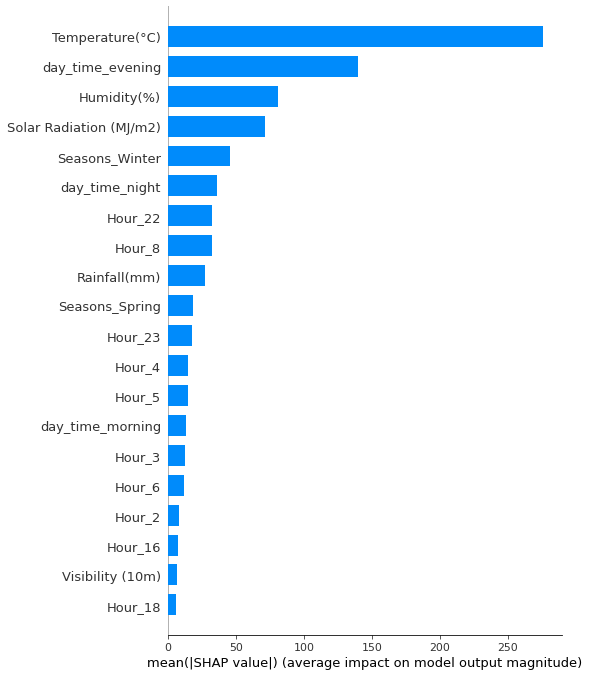

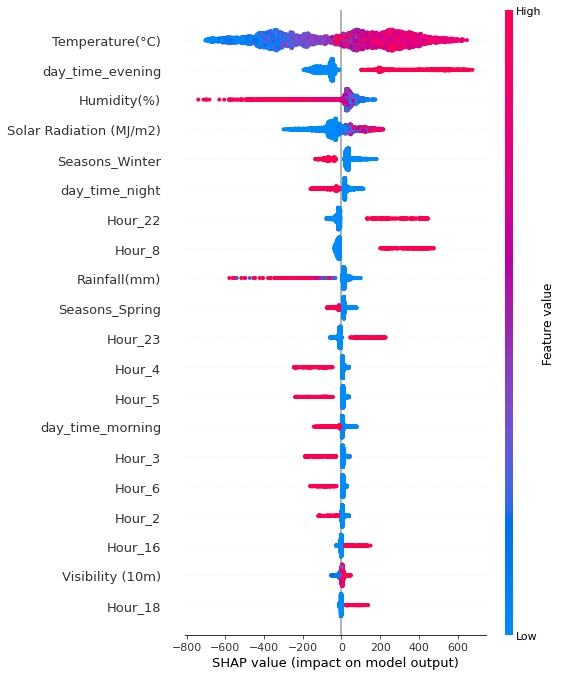

In [ ]:
shap.summary_plot(shap_values, x_train_final, feature_names=features, plot_type="bar")
shap.summary_plot(shap_values, x_train_final, feature_names=features)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Answer Here**
<br> We have used RandomForestRegressor for model explainability using SHAP ( Shapley Additive Explanations). The following observation are:
<br> (1)Temperature is the most important feature for the Rented Bike Demand which also has the highest value of the correlation.
<br> (2) Maximum demand was at the evening, which is the second most important feature as per SHAP value.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib

joblib.dump(rf2, 'Random_Forest.pkl')

['Random_Forest.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_rf = joblib.load('Random_Forest.pkl')
loaded_rf

RandomForestRegressor(max_depth=20, min_samples_split=50, n_estimators=150,
                      random_state=42)

In [ ]:
loaded_rf.predict(x_test_final[0].reshape(1,-1))

array([1593.62765155])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

From the above project we arrive at the following conclusion:
<br>**Exploratory data analysis:**
<br> **Categorical feature**
<br> (1)there are total 295 days where the demand is zero, which is equal to the total number of non-functioning day. It means, on functioning day there is always some demand.
<br> (2) the minimum demand on functioning day is 2 on day Friday season Autumn
<br> (3)The peak hours are 5 to 9 pm and maximum demand at 6pm. However, in morning the maximum demand at 8 am.
<br> (4) The demand is significantly low at early morning about 4 am ,5 am. 
<br> (5) The median demand on no holiday is more than the twice than on the holiday and the maximum demand on no holiday is also 1.5 times the holiday.
<br> (6) In Summer, the average demand is maximum and in winter it is minimum and it totally make sense because in winter due to very cold climatic condition most people dont prefer bike.
<br> (7) The average demand is very low on sunday and maximum on thursday.
<br> (8)In month 6, the average demand is at peak, which might be because in june there is summer season and the temperature range is in 20-30 degree celcius.
<br>(9)the demand is very low in month 12,1,2 and then start increasing, it might be because december,january,february are the winter months and demand is very low in winters but after february the temperature starts rising and due to which the demand is increasing.
<br>**Numerical feature**
<br>(10)with increase in temperature the demand kept increases up to 30 degree celcius after that there is decrease in demand observed.
<br> (11) Demands are hgh during low solar radiation and it decreases with increase in solar radiation
<br> (12) The maximum demand occurs when there is no rainfall or snowfall, However demand drops significantly if there is any rainfall or snowfall.
<br> (13) Demands were high at evening , the favourable conditions are when the wind speed and humidity are in of 1 to 4 m/s and 30 to 70%.
<br>(14)most of snowfall takes place in winter season however some snowfall happened in Automn season also.
<br>(15) In summer also there was rainfall of high depth was also observed, which have negative impact on the business.
<br>**Correlation feature**
<br> (16) The maximum correlation value is 0.91 between temperature and dew point temperature feature.
<br> (17) month feature least impact the demand as it has the least correlation value with the demand.
<br> (18) Rainfall and snowfall impacts negatively to the demand.
<br> (19) Temperature has the maximum correlation value with demand and second highest is hour feature.
<br> **Model training**
<br> (1) Linear, Lasso, Ridge regression model are performing almost similar'
<br> (2) out of  all models the xgboost has the best training and test score but the difference between these scores is high that indicates that model is overfitting. So, we use the RandomForestRegressor as the final model.
<br> **From model explainability**
<br> (1) Temperature is the most important feature for the Rented Bike Demand which also has the highest value of the correlation.
<br>(2) Maximum demand was at the evening, which is the second most important feature as per SHAP value. 
<br>**Conclusion:** our final model predict the Rented Bike Demand with the test rmse score of 228.007 on for new points.    